## Data620 Assignment 3
#### Gabriel Santos 
#### Date: 02-11-2023 

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

#### 1. Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.

I select the data set: "Social circles": Facebook. Link: https://snap.stanford.edu/data/ego-Facebook.html

This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

In [3]:
df = pd.read_table("E:\\Users\\drake\\Documents\\CUNY SPS\\MASTERS\\DATA 620\\Week 3\\facebook_combined.txt", sep = " ", names = ['source','target'])

In [4]:
df.head()

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [6]:
data=nx.read_edgelist("E:\\Users\\drake\\Documents\\CUNY SPS\\MASTERS\\DATA 620\\Week 3\\facebook_combined.txt",create_using=nx.DiGraph(),nodetype=int)

#### 2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.

In [7]:
G = nx.from_pandas_edgelist(df)
print( nx.number_of_nodes(G))
print( nx.number_of_edges(G))


4039
88234


In [8]:
G_subset = nx.from_pandas_edgelist(df[300:400])
nx.algorithms.diameter(G_subset)

8

Node = 4039

Edges = 88234

Diameter = 8

#### 3.  Use a visualization tool of your choice to display information.

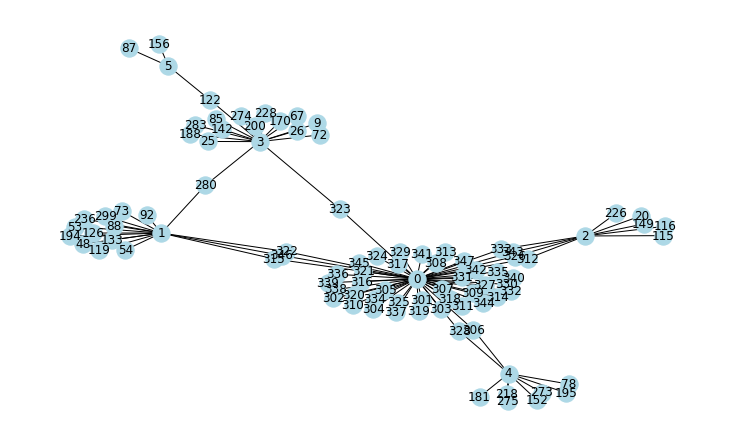

In [9]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
nx.draw(G_subset, node_color='lightblue', with_labels=True)

In the graph there are 2 users, numbers 156 and 87, who are only connected with one user, number 5. Number 5 is only connected with number 122. They are the most isolated users, with fewer connections.
Number 323 only has connections with 2 other users in total, numbers 3 and 0. But those two are well connected with various users.

#### Degree distribution - analysis


Text(0, 0.5, 'Number of nodes')

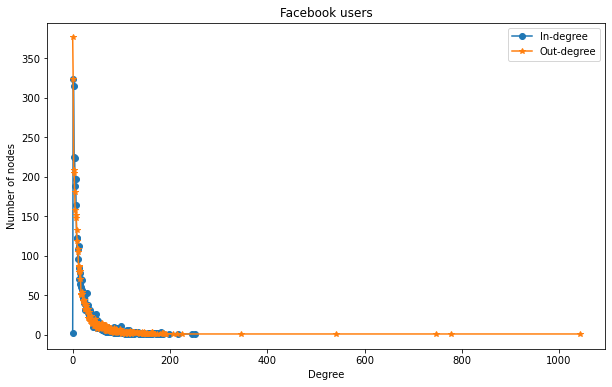

In [10]:
in_degrees = dict(data.in_degree()) 
in_values = sorted(set(in_degrees.values()))
in_hist = [list(in_degrees.values()).count(x) for x in in_values]

out_degrees = dict(data.out_degree()) 
out_values = sorted(set(out_degrees.values()))
out_hist = [list(out_degrees.values()).count(x) for x in out_values]

plt.figure()
plt.plot(in_values,in_hist,'o-') 
plt.plot(out_values,out_hist,'*-') 
plt.legend(['In-degree','Out-degree'])
plt.title('Facebook users')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')


In [11]:
d = nx.degree(data)

In [12]:
min(dict(d).values())

1

At least one not very social user had only 1 connection.

In [13]:
max(dict(d).values())

1045

At the same time we have at least one user with 1045 connections.

Text(0.5, 1.0, 'Distribution of Degrees in User Network')

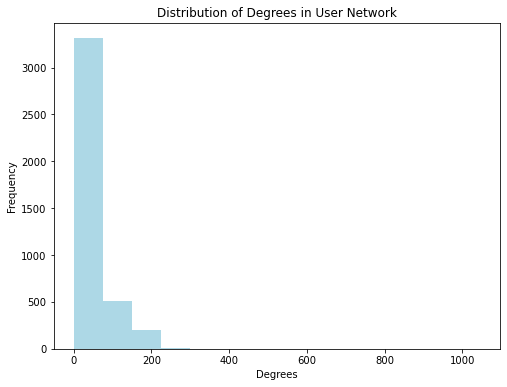

In [14]:
plt.figure(figsize=(8,6))
plt.hist(dict(d).values(), 14, color = "lightblue")
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Distribution of Degrees in User Network')

The distribution of degrees in the user network is heavily skewed to the left, indicating that most users have a relatively low number of connections.